# Machine Learning 
## Assignment 1 - Classification

Group 18 Members:

- Clara Pichler, 11917694
- Hannah Knapp, 11901857 
- Sibel Toprakkiran, 09426341

### Overview

1. Introduction
- Used Data Sets
- Used Classifiers
- Requirements & Dependencies
- Loading in the Data Sets

2. Preprocessing
- Gym Memebers Exercise Tracking
- Abalone
- Amazon Reviews
- Congressional Voting

3. Classification
- Gym Memebers Exercise Tracking
- Abalone
- Amazon Reviews
- Congressional Voting

4. Analysis of Performance 
- Cross Validation
- 

## Introduction

### Used Datasets

__Gym Member Exercise Tracking Data set:__
- _content_: A detailed overview of gym members' exercise routines, physical attributes, and fitness metrics
- _source_: https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset 

__Abalone Data set:__
- _content_: Physical measurements of abalones
- _source_: https://archive.ics.uci.edu/dataset/1/abalone

__Amazon Reviews Data set:__
- _content_: 
- _source_: 

__Congressional Voting Data set:__
- _content_: 
- _source_: 

### Used Classifiers

We chose the following three classifiers for our analysis. 

__Support Vector Machines__

Support Vector Machines transform the feature space into a higher-dimensional space to seperate classes. They have the advantages of being effective in high dimensional spaces and it is still effective in cases where number of dimensions is greater than the number of samples. It uses a subset of training points (support vectors) in the decision function, so it is also memory efficient.


__Random Forest Classifier__



__Multilayer Perceptron__





### Requirements & Dependencies

This project was created using Python 3.12.5 The exact versions of the dependencies can be installed with the following command.

In [1]:
%pip install -r requirements.txt -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt


from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

### Loading in the Data Sets

After downloading all the data frames, which are all saved in the folder `data`, we loaded each of them in by using `pandas`.


In [3]:
df_gym = pd.read_csv('data/gym_members_exercise_tracking.csv')
df_voting = pd.read_csv('data/CongressionalVotingID.shuf.lrn.csv')
df_reviews = pd.read_csv('data/amazon_review_ID.shuf.lrn.csv')

url='./data/abalone.csv'
column_names = ["Sex", "Length", "Diameter", "Height", "Whole_weight", "Shucked_weight", "Viscera_weight", "Shell_weight", "Rings"]
df_abalone = pd.read_csv(url, header=0, names=column_names)

## Preprocessing

In this section we will go over the pre processing of the four data sets. We take a look at the types of the attributes, outliers, their distributions and if the data set has missing values and if yes how do we deal with it accordingly. 

### Gym Member Tracking Exercise

The first data set we will look at has 973 entries and 15 columns, where the attribute `Workout_Type` is our target. It has four unique values `Cardio`, `HIIT`, `Strength` and `Yoga`. We do not have to do interpolation since it has not missing values. Furthermore, every attribute has a fitting type. 

In [4]:
display(df_gym.head(5))
display(df_gym.info(verbose=True))
display(df_gym.describe())
display(df_gym['Workout_Type'].unique())

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

None

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


array(['Yoga', 'HIIT', 'Cardio', 'Strength'], dtype=object)

We now use dummy variables for `Gender`and also our target `Workout_Type`. `Female` will be 0 and `Male` will be 1, as well as : `Yoga` = 0, `HIIT` = 1, `Cardio` = 2 and `Strength` = 3.

In [5]:
df_gym = df_gym.replace("Female", "0").replace("Male", "1")
df_gym = df_gym.replace("Yoga", "0").replace("HIIT", "1").replace("Cardio", "2").replace("Strength", "3")
df_gym['Gender'] = df_gym['Gender'].astype(int)
df_gym['Workout_Type'] = df_gym['Workout_Type'].astype(int)

As for outlier detection we can look at them viusally through histograms, scatter plots or boxplots, we decided to stick to the Interquartile Range (IQR) and also look at the z-score as comparison. 

In [6]:
df_gym_num = df_gym.select_dtypes(include='number')
Q1_gym = df_gym_num.quantile(0.25)
Q3_gym = df_gym_num.quantile(0.75)
IQR_gym = Q3_gym - Q1_gym

IQR_outliers_gym = df_gym_num[((df_gym_num < (Q1_gym - 1.5 * IQR_gym)) | (df_gym_num > (Q3_gym + 1.5 * IQR_gym))).any(axis=1)]
# display(IQR_outliers_gym.info())

df_gym_IQR = df_gym[~((df_gym_num < (Q1_gym - 1.5 * IQR_gym)) | (df_gym_num > (Q3_gym + 1.5 * IQR_gym))).any(axis=1)].reset_index()
display(df_gym_IQR.info(verbose=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          932 non-null    int64  
 1   Age                            932 non-null    int64  
 2   Gender                         932 non-null    int64  
 3   Weight (kg)                    932 non-null    float64
 4   Height (m)                     932 non-null    float64
 5   Max_BPM                        932 non-null    int64  
 6   Avg_BPM                        932 non-null    int64  
 7   Resting_BPM                    932 non-null    int64  
 8   Session_Duration (hours)       932 non-null    float64
 9   Calories_Burned                932 non-null    float64
 10  Workout_Type                   932 non-null    int64  
 11  Fat_Percentage                 932 non-null    float64
 12  Water_Intake (liters)          932 non-null    flo

None

In [7]:
z_scores = stats.zscore(df_gym_num)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

df_gym_Z = df_gym[filtered_entries]
display(df_gym_Z.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            960 non-null    int64  
 1   Gender                         960 non-null    int64  
 2   Weight (kg)                    960 non-null    float64
 3   Height (m)                     960 non-null    float64
 4   Max_BPM                        960 non-null    int64  
 5   Avg_BPM                        960 non-null    int64  
 6   Resting_BPM                    960 non-null    int64  
 7   Session_Duration (hours)       960 non-null    float64
 8   Calories_Burned                960 non-null    float64
 9   Workout_Type                   960 non-null    int64  
 10  Fat_Percentage                 960 non-null    float64
 11  Water_Intake (liters)          960 non-null    float64
 12  Workout_Frequency (days/week)  960 non-null    int64  


None

From looking at the distribution below, we decided to reduce the skewness of `Weight`, `Calories_Burned`, `BMI` and `Fat_Percentage`. For each attribute we used an appropriate transformation, either logarithm, square root or square transformation.

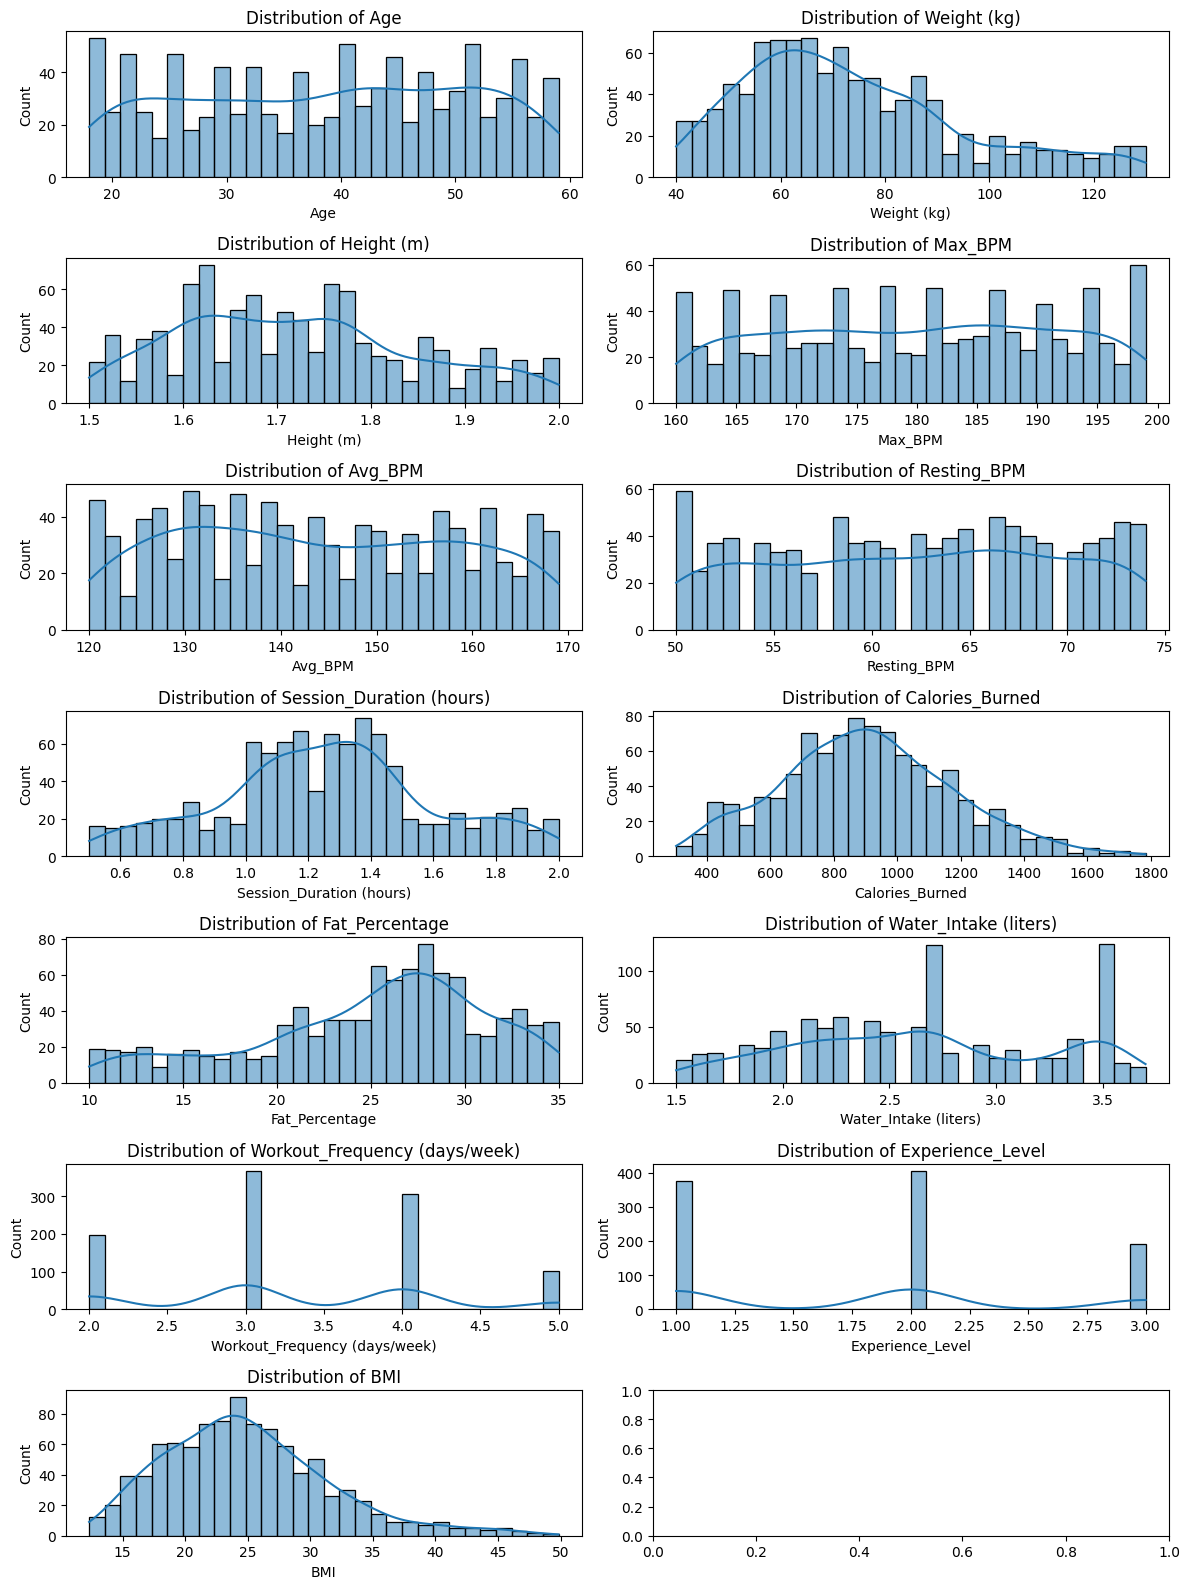

In [8]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12, 16))
axes = axes.flatten()

for i, column in enumerate(df_gym.drop(['Gender', 'Workout_Type'], axis=1).columns):  
    sns.histplot(df_gym[column], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()

In [9]:
df_gym['Calories_Burned'] = np.sqrt(df_gym['Calories_Burned'])
df_gym['BMI'] = np.log(df_gym['BMI'])
df_gym['Weight (kg)'] = np.log(df_gym['Weight (kg)'])
df_gym['Fat_Percentage'] = np.square(df_gym['Fat_Percentage'])

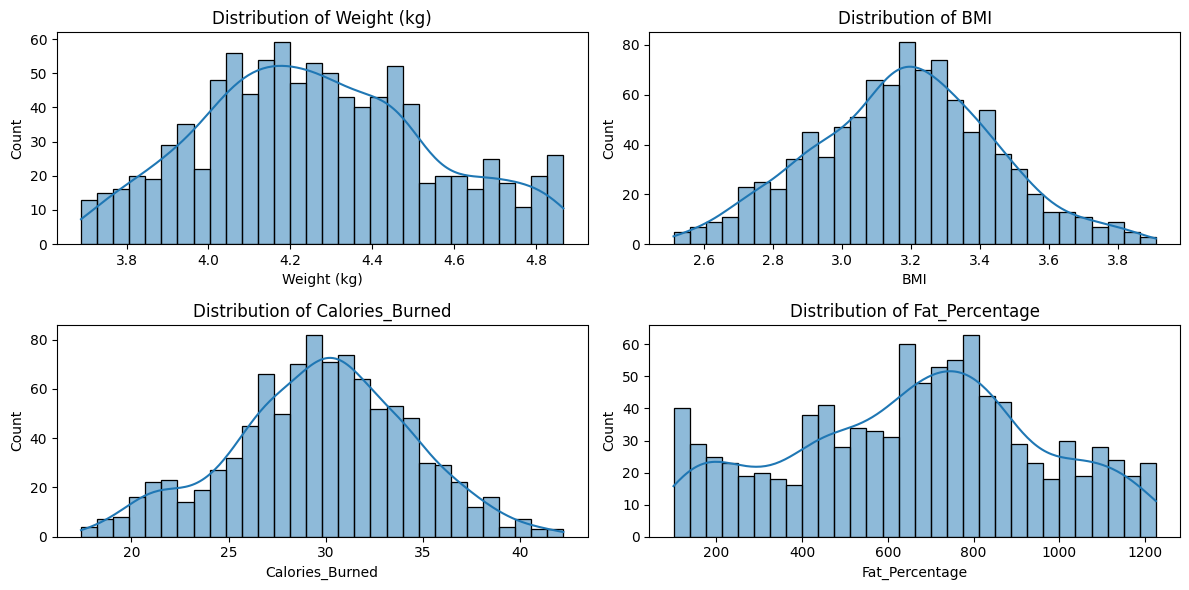

In [10]:
skewed_col = ['Weight (kg)', 'BMI', 'Calories_Burned', 'Fat_Percentage']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
axes = axes.flatten()

for i, column in enumerate(skewed_col):  
    sns.histplot(df_gym[column], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()

### Abalone

### Congressional Voting

### Amazon Reviews

TODO: Feature selection!!

Last but not least we will take a look at the data set `df_reviews`. 

The data set has 750 entries and 1002 atttributes, where the `Class` attribute is the only column with type object and has 50 unique values. The preprocessing part of this dataset does not require a lot of effort, because it has no missing values and scaling would not make sense in this context. Since we have 1000 attributes to work with for predicting the classes, outlier prediction does not make sense visually (histograms, scatter plots, boxplots...) for all of them. We decided on interquartile range (IQR) and also z-score as comparison.

In [11]:
display(df_reviews.info())
reviews_classes = df_reviews['Class'].unique()
print(reviews_classes, len(reviews_classes))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Columns: 10002 entries, ID to Class
dtypes: int64(10001), object(1)
memory usage: 57.2+ MB


None

['Shea' 'Riley' 'Chachra' 'Agresti' 'Nigam' 'Messick' 'Cutey' 'Mitchell'
 'Ashbacher' 'Brody' 'Vernon' 'Goonan' 'Harp' 'Lovitt' 'Corn' 'Engineer'
 'Calvinnme' 'Chell' 'Comdet' 'Kolln' 'Peterson' 'Dent' 'Wilson' 'Mark'
 'Grove' 'Janson' 'Brown' 'Auken' 'Sherwin' 'Cholette' 'McKee' 'Taylor'
 'Walters' 'Merritt' 'Blankenship' 'Chandler' 'Johnson' 'Hayes' 'Koenig'
 'CFH' 'Lawyeraau' 'Davisson' 'Mahlers2nd' 'Power' 'Robert' 'Morrison'
 'Lee' 'Neal' 'Bukowsky' 'Vision'] 50


ID        0
V1        0
V2        0
V3        0
V4        0
         ..
V9997     0
V9998     0
V9999     0
V10000    0
Class     0
Length: 10002, dtype: int64

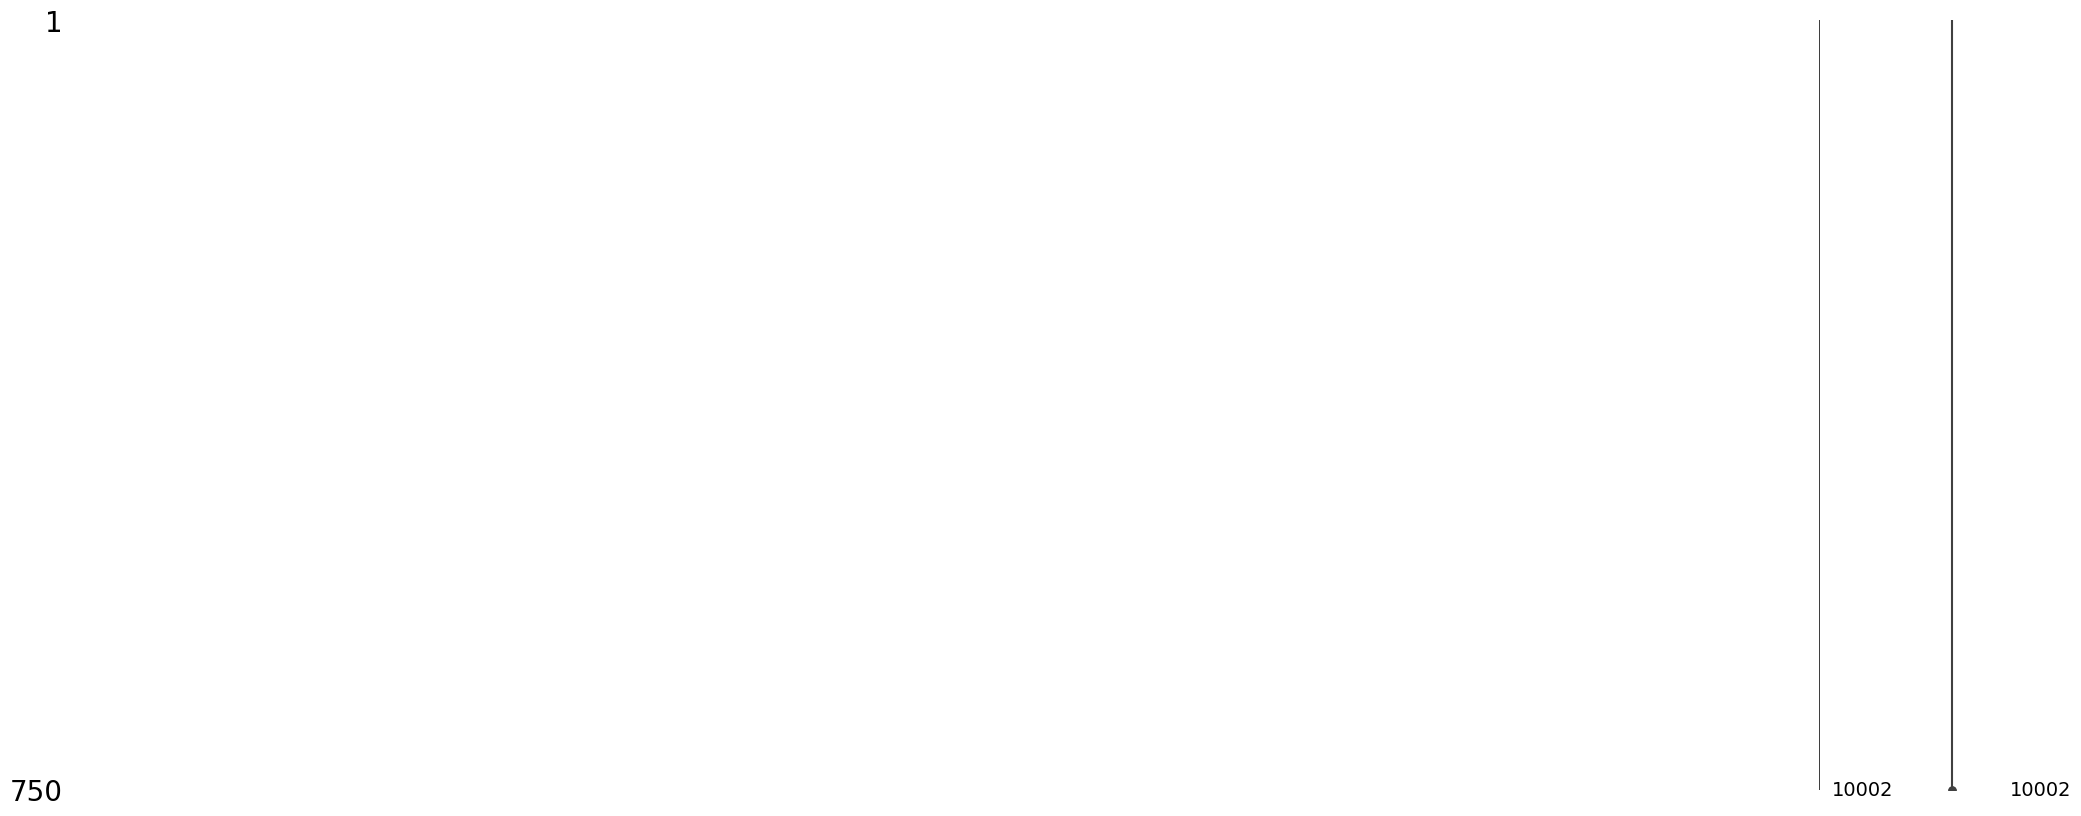

In [12]:
msno.matrix(df_reviews)
df_reviews.isna().sum()

Funny enough both methods IQR and Z-score suggest that in every row there is a outlier for one of the columns. 

In [13]:
df_reviews_num = df_reviews.drop(['ID', 'Class'], axis=1)
Q1_rev = df_reviews_num.quantile(0.25)
Q3_rev = df_reviews_num.quantile(0.75)
IQR_rev = Q3_rev - Q1_rev

IQR_outliers_rev = df_reviews_num[((df_reviews_num < (Q1_rev - 1.5 * IQR_rev)) | (df_reviews_num > (Q3_rev + 1.5 * IQR_rev))).any(axis=1)]
display(IQR_outliers_rev.head(5))
display(IQR_outliers_rev.info())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
0,17,4,8,8,9,4,0,2,3,5,...,0,0,0,0,0,0,0,0,1,1
1,21,9,5,8,6,2,16,3,12,6,...,0,0,0,0,2,2,1,0,1,0
2,9,7,6,3,8,2,9,4,4,5,...,0,0,0,0,0,0,0,0,1,1
3,8,3,5,2,4,3,8,2,4,4,...,0,0,0,1,0,1,0,0,0,0
4,15,8,8,4,7,8,4,7,1,3,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Columns: 10000 entries, V1 to V10000
dtypes: int64(10000)
memory usage: 57.2 MB


None

In [14]:
z_scores_rev = stats.zscore(df_reviews_num)
abs_z_scores_rev = np.abs(z_scores_rev)
filtered_entries_rev = (abs_z_scores_rev < 3).all(axis=1)

df_reviews_Z = df_reviews[filtered_entries_rev]
display(df_reviews_Z.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 10002 columns):
 #      Column  Dtype 
---     ------  ----- 
 0      ID      int64 
 1      V1      int64 
 2      V2      int64 
 3      V3      int64 
 4      V4      int64 
 5      V5      int64 
 6      V6      int64 
 7      V7      int64 
 8      V8      int64 
 9      V9      int64 
 10     V10     int64 
 11     V11     int64 
 12     V12     int64 
 13     V13     int64 
 14     V14     int64 
 15     V15     int64 
 16     V16     int64 
 17     V17     int64 
 18     V18     int64 
 19     V19     int64 
 20     V20     int64 
 21     V21     int64 
 22     V22     int64 
 23     V23     int64 
 24     V24     int64 
 25     V25     int64 
 26     V26     int64 
 27     V27     int64 
 28     V28     int64 
 29     V29     int64 
 30     V30     int64 
 31     V31     int64 
 32     V32     int64 
 33     V33     int64 
 34     V34     int64 
 35     V35     int64 
 36     V36     int64 
 37     V37 

None

## Classification

For the main part of this project we will apply our three chosen classifiers to our four data sets. 

### Gym Member Exercise Tracking

#### SVM

First we will split the data into train and test sets. We have already scaled and transformed non numerical labels into numerical labels.

In [15]:
X_gym= df_gym.drop('Workout_Type', axis=1)
y_gym=df_gym['Workout_Type'] 

X_gym_train, X_gym_test, y_gym_train, y_gym_test = train_test_split(X_gym,y_gym, random_state=104, 
                                                                    test_size=0.25, shuffle=True)

Hyperparameter tuning using grid search and cross validation:

In [16]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
               {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [17]:
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_gym_train, y_gym_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [18]:
print('Best score for training data:', svm_model.best_score_,"\n") 
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

Best score for training data: 0.2757392536608408 

Best C: 10 

Best Kernel: linear 

Best Gamma: scale 



In [ ]:
final_model_gym = svm_model.best_estimator_
y_gym_pred = final_model_gym.predict(X_gym_test)

print(confusion_matrix(y_gym_test,y_gym_train))
print("\n")
print(classification_report(y_gym_test,y_gym_train))

print("Training set score for SVM: %f" % final_model_gym.score(X_gym_train , y_gym_train))
print("Testing  set score for SVM: %f" % final_model_gym.score(X_gym_test  , y_gym_test ))

svm_model.score

In [ ]:
print("Hallo")

### Abalone

### Congressional Voting

### Amazon Reviews

## Analysis of Performance

## 